In [1]:
from electra_package.release_2 import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
file = "XIN803"
path = "./data/lineas_completas/" 

summary1 = pd.read_csv(path+file+"_summary_27.8.24_2.csv")
summary1.shape

(163, 10)

In [3]:
file = "VDI711"
path = "./data/lineas_completas/" 

summary2 = pd.read_csv(path+file+"_summary_27.8.24_2.csv")
summary2.shape

(129, 10)

In [4]:
summary = pd.concat([summary1, summary2])

In [5]:
summary["PUNTUACION_APRIORI"].max(),summary["PUNTUACION_APRIORI"].min(),  summary["PUNTUACION_APOSTERIORI"].max(), summary["PUNTUACION_APOSTERIORI"].min()

(10.0, -99.0, nan, nan)

- ### Distribución de notas antes y después de la reconstrucción
- Ratio de notas aposteriori vs apriori

In [6]:
summary.shape

(292, 10)

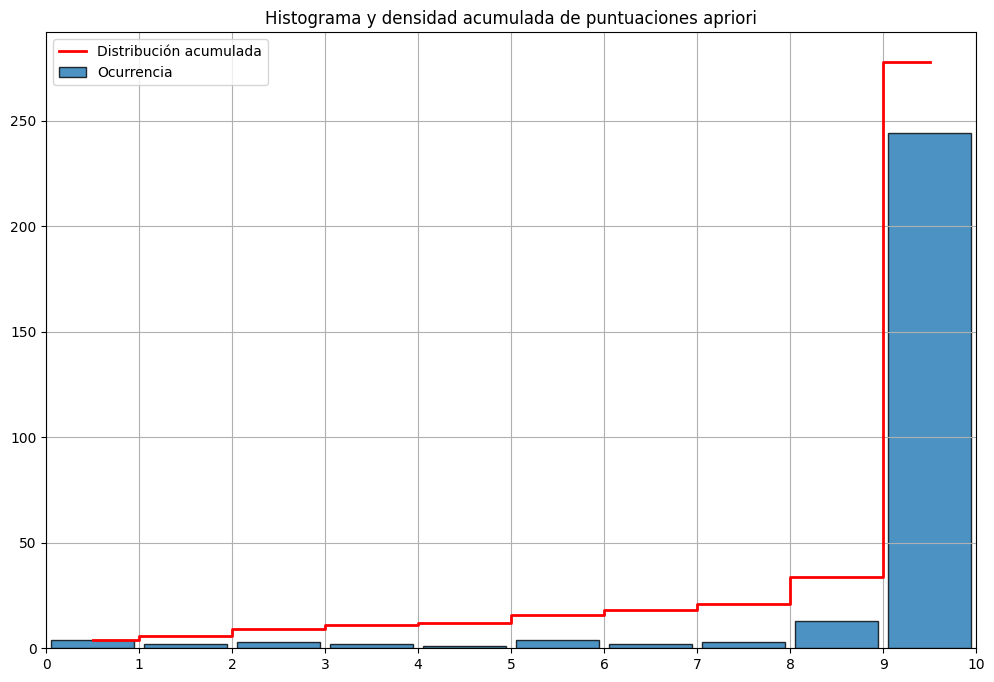

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming summary is your DataFrame and PUNTUACION_APRIORI is the column of interest
# Also assuming that summary DataFrame is already defined.

# Calculate the histogram
values, bins = np.histogram(
    summary[(summary["PUNTUACION_APRIORI"] >= 0.0) & (summary["PUNTUACION_APRIORI"] <= 10.0)]["PUNTUACION_APRIORI"], 
    bins=10, range=(0, 10), density=False
)

# Calculate the center of each bin for positioning
bin_centers = (bins[:-1] + bins[1:]) / 2.0

# Plot the density function (histogram)
plt.figure(figsize=(12, 8))
plt.bar(bin_centers, values, width=0.9, label="Ocurrencia", alpha=0.8, edgecolor="black")

# Plot the cumulative distribution
cumulative_values = values.cumsum()
plt.step(bin_centers, cumulative_values, where='mid', color='red', label='Distribución acumulada', linewidth=2)

# Configure plot settings
plt.xlim((0, 10))
plt.xticks(np.arange(0, 11, 1))
plt.title("Histograma y densidad acumulada de puntuaciones apriori")
plt.legend()
plt.grid(True)
plt.show()


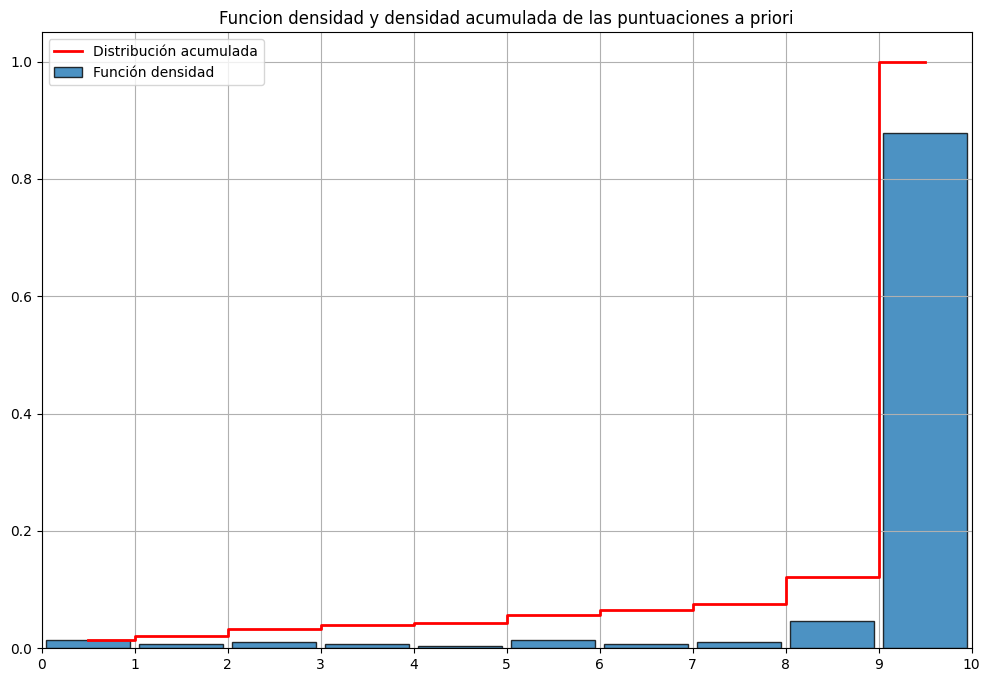

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming summary is your DataFrame and PUNTUACION_APRIORI is the column of interest
# Also assuming that summary DataFrame is already defined.

# Calculate the histogram
values, bins = np.histogram(
    summary[(summary["PUNTUACION_APRIORI"] >= 0.0) & (summary["PUNTUACION_APRIORI"] <= 10.0)]["PUNTUACION_APRIORI"], 
    bins=10, range=(0, 10), density=True
)

# Calculate the center of each bin for positioning
bin_centers = (bins[:-1] + bins[1:]) / 2.0

# Plot the density function (histogram)
plt.figure(figsize=(12, 8))
plt.bar(bin_centers, values, width=0.9, label="Función densidad", alpha=0.8, edgecolor="black")

# Plot the cumulative distribution
cumulative_values = values.cumsum()
plt.step(bin_centers, cumulative_values, where='mid', color='red', label='Distribución acumulada', linewidth=2)

# Configure plot settings
plt.xlim((0, 10))
plt.xticks(np.arange(0, 11, 1))
plt.title("Funcion densidad y densidad acumulada de las puntuaciones a priori")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
counts = ([],[])

for flag in summary["FLAG"].unique():
    
    cases = (summary["FLAG"] == flag).sum()
    perc = 100*cases/summary.shape[0]
    counts[0].append(flag)
    counts[1].append(perc)
    
pd.DataFrame(counts)

,0,1,2,3,4,5,6
0,good_fit,found_empty_polis,bad_cluster,bad_cond_number,bad_backings,no_polilineas,empty_conductor
1,82.876712,8.219178,1.369863,0.342466,4.452055,2.39726,0.342466


- ### Casos rechazados

In [57]:
no_reconstruidos = summary[summary["RECONSTRUCCION"] != "Posible"]

print(f"Porcentaje de casos no reconstruidos vs reconstruidos para linea {file}: {100*no_reconstruidos.shape[0]/summary.shape[0]}, {100*abs(no_reconstruidos.shape[0]-summary.shape[0])/summary.shape[0]}")

no_reconstruidos["ID_VANO"].to_list()

Porcentaje de casos no reconstruidos vs reconstruidos para linea XIN803: 4.4520547945205475, 95.54794520547945


['G_13037116_13511437',
 'G_13645707_13645750',
 'G_13645910_13645956',
 'G_13645661_13645713',
 'G_13645712_13645761',
 'G_13645681_13645990',
 'G_13645800_13645927',
 'C_13411729_13411832',
 'C_13412123_13412124',
 'C_13411667_13411668',
 'C_13434463_13434464',
 'C_13411772_13411889',
 'C_13434480_13434481']

In [56]:
counts = ([],[])

for flag in no_reconstruidos["FLAG"].unique():
    
    cases = (no_reconstruidos["FLAG"] == flag).sum()
    perc = 100*cases/no_reconstruidos.shape[0]
    counts[0].append(flag)
    counts[1].append(perc)
    
pd.DataFrame(counts)

,0,1,2,3
0,bad_cluster,bad_cond_number,bad_backings,empty_conductor
1,30.769231,7.692308,53.846154,7.692308


In [13]:
bad_data = summary[summary["PUNTUACION_APRIORI"] < 0]

print(f"Casos con malos datos vs buenos datos {file}: {100*bad_data.shape[0]/summary.shape[0]}, {100*abs(bad_data.shape[0]-summary.shape[0])/summary.shape[0]}")

bad_data["ID_VANO"].to_list()

Casos con malos datos vs buenos datos XIN803: 4.794520547945205, 95.20547945205479


['G_13645707_13645750',
 'G_13645661_13645713',
 'G_13645712_13645761',
 'G_13645739_13645998',
 'C_13411890_13411891',
 'C_13411729_13411832',
 'C_13411725_13411730',
 'C_13411885_13411890',
 'C_13411667_13411668',
 'C_13411725_13411728',
 'C_13434463_13434464',
 'C_13411829_13411830',
 'C_13411772_13411889',
 'C_13434480_13434481']

In [44]:
counts = ([],[])

for flag in bad_data["FLAG"].unique():
    
    cases = (bad_data["FLAG"] == flag).sum()
    perc = 100*cases/bad_data.shape[0]
    counts[0].append(flag)
    counts[1].append(perc)
    
counts

(['bad_cond_number', 'bad_backings'], [7.142857142857143, 92.85714285714286])

In [42]:
bad_data["FLAG"]

14     bad_cond_number
40        bad_backings
61        bad_backings
100       bad_backings
29        bad_backings
40        bad_backings
41        bad_backings
52        bad_backings
55        bad_backings
56        bad_backings
59        bad_backings
89        bad_backings
112       bad_backings
126       bad_backings
Name: FLAG, dtype: object

- ### Casos con mala nota apriori

In [58]:
mala_nota = summary[(summary["PUNTUACION_APRIORI"] < 3)*(summary["PUNTUACION_APRIORI"] > 0)]

print(f"Casos con mala nota {file}: {100*mala_nota.shape[0]/summary.shape[0]}")

mala_nota["ID_VANO"].to_list()

Casos con mala nota XIN803: 2.73972602739726


['G_13037116_13511437',
 'G_13645821_13645862',
 'G_13645681_13645990',
 'G_13088936_13145989',
 'G_92006814_92006815',
 'G_13037116_13645737',
 'G_13645871_13645951',
 'G_13645800_13645927']

- ### Casos con nota regular apriori

In [59]:
regular_nota = summary[(3 <= summary["PUNTUACION_APRIORI"])*(7 >= summary["PUNTUACION_APRIORI"] )]

print(f"Casos con nota regular {file}: {100*regular_nota.shape[0]/summary.shape[0]}")

regular_nota["ID_VANO"].to_list()

Casos con nota regular XIN803: 3.0821917808219177


['G_13645875_13645996',
 'G_13645862_13645986',
 'G_13088932_13149467',
 'G_13645666_13645811',
 'G_13645720_13645976',
 'G_13645946_13645982',
 'G_13645843_13645881',
 'C_13411824_13411826',
 'C_13411775_13411776']

- ### Casos con buena nota apriori

In [60]:
buena_nota = summary[(7 < summary["PUNTUACION_APRIORI"])]

print(f"Casos con nota buena {file}: {100*buena_nota.shape[0]/summary.shape[0]}")

buena_nota["ID_VANO"].to_list()

Casos con nota buena XIN803: 89.04109589041096


['G_13645821_13645987',
 'G_13645776_13645990',
 'G_13645684_13645777',
 'G_13615863_13645824',
 'G_13645732_13645823',
 'G_13499432_13645947',
 'G_13645686_13645952',
 'G_13618881_13645690',
 'G_13645790_13645962',
 'G_13645744_13645920',
 'G_13645844_13645888',
 'G_13645647_13645791',
 'G_13645750_13645842',
 'G_13645718_13645899',
 'G_13645765_13645809',
 'G_13645665_13645719',
 'G_13088932_13645854',
 'G_13145989_13645938',
 'G_13645721_13645813',
 'G_13645767_13645812',
 'G_13645817_13645977',
 'G_13645668_13645817',
 'G_13645771_13645980',
 'G_13645819_13645906',
 'G_13645819_13645981',
 'G_13645981_13645982',
 'G_13645776_13645989',
 'G_13645683_13645951',
 'G_13645681_13645867',
 'G_13645733_13645868',
 'G_13645738_13645781',
 'G_13645687_13645874',
 'G_13645737_13645873',
 'G_13511437_13511438',
 'G_13645910_13645956',
 'G_13645695_13645696',
 'G_13597802_13645916',
 'G_13645947_13645992',
 'G_13645798_13645842',
 'G_13645720_13645855',
 'G_13645809_13645810',
 'G_13645722_136

In [51]:
summary[(summary["RECONSTRUCCION"] == "Posible")*(summary["FLAG"] == "bad_backings")]

,Unnamed: 0,ID_VANO,RECONSTRUCCION,FLAG,NUM_CONDUCTORES,NUM_CONDUCTORES_FIABLE,CONFIG_CONDUCTORES,COMPLETITUD,PUNTUACION_APRIORI,PUNTUACION_APOSTERIORI
100,100,G_13645739_13645998,Posible,bad_backings,3,True,0.0,full,-99.0,NaN
29,29,C_13411890_13411891,Posible,bad_backings,3,True,0.0,full,-99.0,NaN
41,41,C_13411725_13411730,Posible,bad_backings,3,True,0.0,full,-99.0,NaN
52,52,C_13411885_13411890,Posible,bad_backings,3,True,0.0,partially incomplete,-99.0,NaN
56,56,C_13411725_13411728,Posible,bad_backings,3,True,0.0,full,-99.0,NaN
89,89,C_13411829_13411830,Posible,bad_backings,3,True,0.0,full,-99.0,NaN


- ### Casos con mala nota aposteriori

In [ ]:
summary[summary["PUNTUACION_APOSTERIORI"] <= 8]

- ### Casos donde nuestra nota es mejor

In [ ]:
summary[summary["PUNTUACION_APRIORI"] < summary["PUNTUACION_APOSTERIORI"] ]

- ### Casos donde nuestra nota es peor

In [ ]:
summary[summary["PUNTUACION_APRIORI"] > summary["PUNTUACION_APOSTERIORI"]]

In [12]:
file = "XIN803_summary.csv"
path = "./data/results/"

summary = pd.read_csv(path+file)
print(f"NUM VANOS: {summary.shape[0]}")

good = summary[summary["RECONSTRUCCION"] == "Posible"]
bad = summary[summary["RECONSTRUCCION"] == "Imposible"]

print(f"Good cases vs bad cases: {good.shape[0]} vs {bad.shape[0]}")

good_puntuated = good[good["FLAG"] == "good_fit"]

error_pol, error_cat = good["ERROR_POLILINEA"].mean(), good["ERROR_CATENARIA"].mean()

print(f"RMSE POLI vs CATE: {error_pol} vs {error_cat}")

bad.iloc[:,[1,3,4,7,6]]

NUM VANOS: 163
Good cases vs bad cases: 136 vs 27
RMSE POLI vs CATE: 1.6711278784253285 vs 0.7552466875992536


,ID_VANO,FLAG,NUM_CONDUCTORES,COMPLETITUD,CONFIG_CONDUCTORES
5,G_13499432_13645947,bad_cluster,3,full0,0.0
7,G_13037116_13511437,empty_conductor,0,incomplete8,0.0
22,G_13645817_13645977,bad_cluster,3,full0,0.0
36,G_13645910_13645956,bad_cluster,3,full0,0.0
39,G_13645947_13645992,bad_cluster,3,full0,0.0
40,G_13645661_13645713,bad_backings,0,NaN,NaN
47,G_13645821_13645862,empty_conductor,0,incomplete7,1.0
54,G_13645954_13645956,bad_cluster,3,full0,0.0
59,G_13645862_13645986,empty_conductor,0,incomplete6,0.0
61,G_13645712_13645761,bad_backings,0,NaN,NaN


In [13]:
not_full = summary[summary["COMPLETITUD"] != "full0"]

not_full_posible = not_full[not_full["RECONSTRUCCION"] == "Posible"]

not_full_posible

,Unnamed: 0,ID_VANO,RECONSTRUCCION,FLAG,NUM_CONDUCTORES,NUM_CONDUCTORES_FIABLE,CONFIG_CONDUCTORES,COMPLETITUD,PORCENTAJE_HUECOS,ERROR_POLILINEA,ERROR_CATENARIA
1,1,G_13645776_13645990,Posible,no_vertices,3,True,0.0,partially incomplete4,50.000000,0.000000,0.829755
12,12,G_13645647_13645791,Posible,good_fit,3,True,0.0,full1,48.509931,2.659368,0.702052
14,14,G_13645707_13645750,Posible,no_vertices,3,True,0.0,partially incomplete4,50.000000,0.000000,1.267045
34,34,G_13645737_13645873,Posible,good_fit,3,True,0.0,full1,48.415423,1.660211,1.080092
55,55,G_13645954_13645996,Posible,good_fit,3,True,0.0,full1,47.632803,2.284161,0.397122
69,69,G_13088932_13149467,Posible,no_vertices,3,True,0.0,partially incomplete5,50.000000,0.000000,1.224721
78,78,G_13645645_13645918,Posible,no_vertices,3,True,0.0,full1,50.000000,0.000000,0.175006
90,90,G_13645845_13645928,Posible,good_fit,3,True,0.0,partially incomplete3,48.576526,2.109036,1.284365
106,106,G_13645666_13645811,Posible,good_fit,3,True,0.0,full1,48.522863,2.232953,1.453057
116,116,G_13618881_13645911,Posible,no_vertices,3,True,0.0,partially incomplete4,50.000000,0.000000,1.229371


In [14]:
print("% Posible", 100*not_full_posible.shape[0]/not_full.shape[0])

% Posible 50.0


In [15]:
file = "VDI711_summary.csv"
path = "./data/results/"

summary = pd.read_csv(path+file)
print(f"NUM VANOS: {summary.shape[0]}")

good = summary[summary["RECONSTRUCCION"] == "Posible"]
bad = summary[summary["RECONSTRUCCION"] == "Imposible"]

print(f"Good cases vs bad cases: {good.shape[0]} vs {bad.shape[0]}")

good_puntuated = good[good["FLAG"] == "good_fit"]

error_pol, error_cat = good["ERROR_POLILINEA"].mean(), good["ERROR_CATENARIA"].mean()

print(f"RMSE POLI vs CATE: {error_pol} vs {error_cat}")

bad.iloc[:,[1,3,4,7,6]]

NUM VANOS: 129
Good cases vs bad cases: 114 vs 15
RMSE POLI vs CATE: 1.3125291403062493 vs 0.7180545414377297


,ID_VANO,FLAG,NUM_CONDUCTORES,COMPLETITUD,CONFIG_CONDUCTORES
0,C_13411888_13411889,bad_cluster,3,full0,0.0
23,C_13434462_13434463,empty_conductor,0,incomplete6,0.0
30,C_13411884_13411885,bad_cluster,3,full0,0.0
31,C_13411817_13411822,empty_conductor,0,partially incomplete5,0.0
40,C_13411729_13411832,bad_backings,0,NaN,NaN
54,C_13412123_13412124,empty_conductor,0,partially incomplete4,1.0
55,C_13411667_13411668,bad_backings,0,NaN,NaN
59,C_13434463_13434464,bad_backings,0,NaN,NaN
77,C_13412084_13412085,empty_conductor,0,incomplete8,0.0
81,C_13411824_13411826,empty_conductor,0,partially incomplete4,0.0


In [16]:
file = "REG804.jsonREG804_summary.csv"
path = "./data/lineas_completas/"

summary = pd.read_csv(path+file)
print(f"NUM VANOS: {summary.shape[0]}")

good = summary[summary["RECONSTRUCCION"] == "Posible"]
bad = summary[summary["RECONSTRUCCION"] == "Imposible"]

print(f"Good cases vs bad cases: {good.shape[0]} vs {bad.shape[0]}")

good_puntuated = good[good["FLAG"] == "good_fit"]

error_pol, error_cat = good["ERROR_POLILINEA"].mean(), good["ERROR_CATENARIA"].mean()

print(f"RMSE POLI vs CATE: {error_pol} vs {error_cat}")

bad.iloc[:,[1,3,4,7,6]]

FileNotFoundError: [Errno 2] No such file or directory: './data/lineas_completas/REG804.jsonREG804_summary.csv'